In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import json

In [28]:
TRAIN_PATH = './connect-4/connect-4.data'
NAME_PATH = './connect-4/connect-4.names'
# TEST_PATH = './dota2Dataset/dota2Test.csv'
BINARY_CLASS_PATH = './connect-4/connect-4-binary.csv'

In [3]:
df = pd.read_csv(TRAIN_PATH, header=None, index_col=None)
# df_test = pd.read_csv(TEST_PATH, header=None, index_col=None)

In [16]:
df.replace('b', 0, inplace=True)
df.replace('x', 1, inplace=True)
df.replace('o', -1, inplace=True)
df.replace('win', 1, inplace=True)
df.replace('loss', -1, inplace=True)
df.replace('draw', 0, inplace=True)

In [17]:
print(df.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')


In [18]:
print(df.describe())

                 0             1             2             3             4   \
count  67557.000000  67557.000000  67557.000000  67557.000000  67557.000000   
mean       0.028524      0.001835     -0.004826     -0.003538     -0.000266   
std        0.793350      0.598167      0.425350      0.296529      0.184194   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  67557.000000  67557.000000  67557.000000  67557.000000  67557.000000   
mean      -0.003123      0.088710     -0.002235     -0.007238     -0.003952   
std        0.087425      0.818452      0.624853    

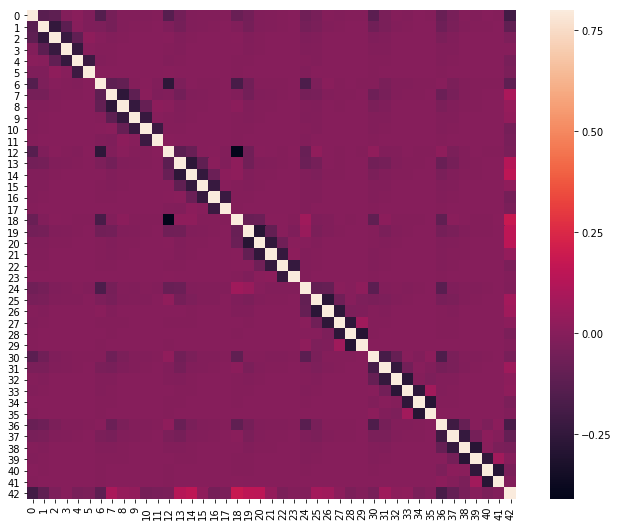

In [19]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [20]:
print(df.head())

   0   1   2   3   4   5   6   7   8   9  ...  33  34  35  36  37  38  39  40  \
0   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0  -1   0   0   0 ...   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
4  -1   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   

   41  42  
0   0   1  
1   0   1  
2   0   1  
3   0   1  
4   0   1  

[5 rows x 43 columns]


In [21]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head())
print('Any missing: {}'.format((total > 0).sum()))

    Total  Percent
42      0      0.0
10      0      0.0
18      0      0.0
17      0      0.0
16      0      0.0
Any missing: 0


In [23]:
print(df.iloc[:, 0].unique())
# print(df_test.iloc[:, 0].unique())

[ 0 -1  1]


In [ ]:
# with open(NAME_PATH, "r") as read_file:
#     data = json.loads(read_file)
#     print(read_file)

In [25]:
win_loss = df.iloc[:, 42] != 0
df = df[win_loss]
print(df.iloc[:, 42].unique())

[ 1 -1]


In [29]:
df.to_csv(BINARY_CLASS_PATH, header=False, index=False)